In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../2016_Q4_ML_Dataset/db/iris.csv')

In [3]:
df.head(2)

,sepal_len,sepal_width,petal_len,petal_width,iris_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
class perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta    = eta
        self.n_iter = n_iter
    
    def fit(self,x,y):
        self.w_     = np.zeros(1+x.shape[1])
        self.error_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x,y):
                update       = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int(update != 0)
            self.error_.append(errors)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self,x):
        return np.where(self.net_input(x)>=0.0, 1, -1)

In [70]:
train_idx_range = [0:100]

SyntaxError: invalid syntax (<ipython-input-70-9eea1f0fcc68>, line 1)

In [63]:
y = df.iloc[0:100,4].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [64]:
y = np.where(y=='Iris-setosa',-1,1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [65]:
# x= s[epal len, petal len]
x = df.iloc[0:100,[0,2]].values
x[:5,]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

In [66]:
z= zip(x,y)
z[0:5]

[(array([ 5.1,  1.4]), -1),
 (array([ 4.9,  1.4]), -1),
 (array([ 4.7,  1.3]), -1),
 (array([ 4.6,  1.5]), -1),
 (array([ 5. ,  1.4]), -1)]

In [68]:
ppn.fit(x,y)

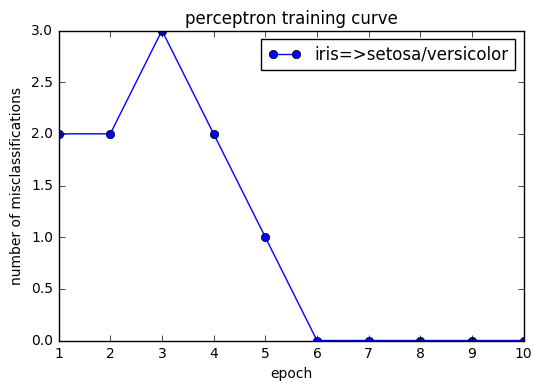

In [69]:
plt.plot(range(1,len(ppn.error_)+1),ppn.error_,marker='o',label='iris=>setosa/versicolor')
plt.xlabel('epoch')
plt.ylabel('number of misclassifications')
plt.title('perceptron training curve')
plt.legend(loc='upper right')
plt.show()